In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [3]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [4]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


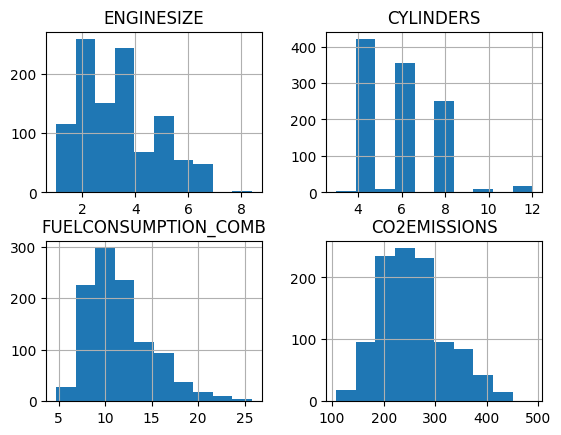

In [5]:
viz = cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
viz.hist()
plt.show()


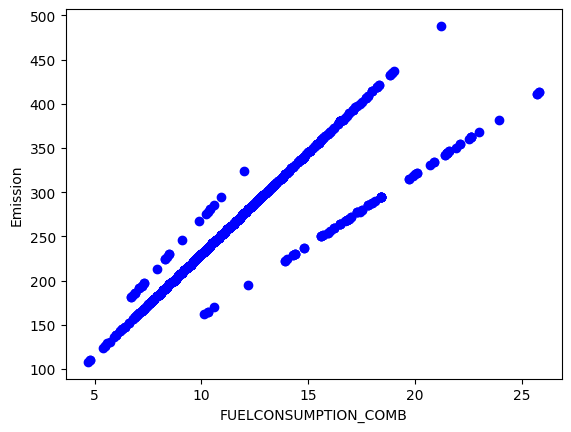

In [6]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

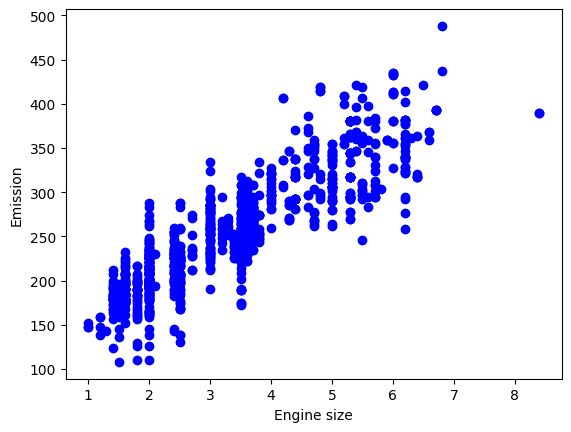

In [7]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [8]:
msk = np.random.rand(len(df)+1) < 0.8
a = msk.reshape((len(df)+1)//12,12)
print(a)
print(msk)
print(~msk)


[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True False]
 [ True  True  True ...  True  True  True]
 ...
 [False  True  True ...  True False  True]
 [False  True  True ... False  True False]
 [False  True False ...  True  True  True]]
[ True  True  True ...  True  True  True]
[False False False ... False False False]


In [9]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

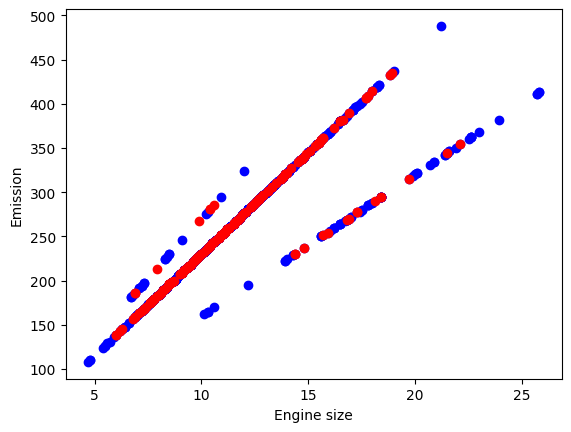

In [10]:
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS,  color='blue')
plt.scatter(test.FUELCONSUMPTION_COMB, test.CO2EMISSIONS,  color='red')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

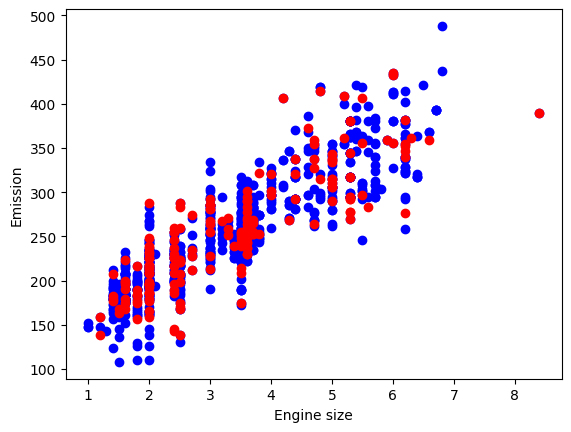

In [11]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS,  color='red')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [12]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.array(train[['ENGINESIZE','FUELCONSUMPTION_COMB']])
train_y = np.array(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[20.41709814  9.30686823]]
Intercept:  [79.97867598]


In [21]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['ENGINESIZE','FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
print(regr.fit(train_x,train_y).predict(test_x))
print(test_y)

[[199.92125225]
 [250.09132276]
 [345.62669946]
 [319.26480805]
 [312.75000028]
 [354.72422554]
 [217.6043019 ]
 [330.46205591]
 [351.80984088]
 [205.50537319]
 [216.67361507]
 [281.70566876]
 [233.36796592]
 [214.75422945]
 [288.01113437]
 [346.73772246]
 [306.62487084]
 [244.5362078 ]
 [299.17937625]
 [205.50537319]
 [260.50921398]
 [205.29603104]
 [221.32704919]
 [361.05869714]
 [263.30127445]
 [257.71715351]
 [262.37058763]
 [251.20234575]
 [344.30633432]
 [318.24710327]
 [181.1561856 ]
 [180.22549878]
 [213.67221245]
 [341.75262199]
 [345.50437527]
 [377.45038763]
 [220.36735638]
 [252.13303257]
 [324.12758432]
 [306.3865227 ]
 [349.19811658]
 [182.08687243]
 [168.69658457]
 [359.43567163]
 [316.62407776]
 [267.95470857]
 [270.74676904]
 [192.32442748]
 [249.3409721 ]
 [228.56320162]
 [287.49913186]
 [287.49913186]
 [254.92509304]
 [254.92509304]
 [291.22187915]
 [220.18702021]
 [222.04839386]
 [257.71715351]
 [299.59806056]
 [196.19850496]
 [324.66859282]
 [251.9526964 ]
 [213.88

In [14]:
testinput = [
            {'ENGINESIZE':3.5,'FUELCONSUMPTION_COMB':10.6}
]
testinput1 = pd.DataFrame(testinput)
testinput1

,ENGINESIZE,FUELCONSUMPTION_COMB
0,3.5,10.6


In [18]:
from sklearn.metrics import r2_score
x = regr.predict(testinput1)

c:\Users\erfan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [24]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE' , 'FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

# print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y - test_y)))
# print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % regr.score(test_x , test_y_))

R2-score: 1.00
